# Numerical Linear Algebra For Machine Learning
----------------

## Introduction
------------------

Numerical linear algebra (and numerical analysis more generally) was one of thoses courses that I learned, thought was boring and hated. Only with maturity that comes with ages was I able to understand and appreciate the true power of numerical linear alebra.  Infact *understanding (distribued) linear algebra is probably one of the most important and useful tools I have ever learned.*  It has allowed me to contribute to open source libraries for scientific computing and understand how big data and machine learning systems. In scientific computing and machine learning one is interested in **how to approximate a function** $f(x)$.  Numerical analysis and statistics concerns itself with **how good is our approximation to** $f(x)$?

One learns in Calculus to approximate smooth functions \$f(x)\$ about some point \$x_0\$ using a special polynomials called, Taylor series,


\begin{equation}
f(x) \, = \sum_{n=0}^{\infty} \, a_n (x - x_0)^{n}
\end{equation}

The approximation,


\begin{equation}
f(x) \, \simeq \, f_N(x) \, = \, a_0  \, + \, a_1 (x - x_0) \, + \,a_2 (x - x_0)^2 \, + \ldots \, + \, a_N (x - x_0)^N
\end{equation}


We learn we can find the coefficients to the series by the equation,


\begin{equation} 
a_{n} \; = \; \frac{(-1)^{n} }{n!} \, f^{n}(x_0)
\end{equation}


One learns there is a radius of convergence $R$ such that within $(x_0 - R, x_0 + R)$ (one should test the end points too) the series converges to $f(x)$ and outside that it does not.  Taylor series were originaly developed to <a href="https://en.wikipedia.org/wiki/Power_series_solution_of_differential_equations">approximate solutions to differential equations</a>. As science and engineering progressed the differential equations become more complicated and harder so solve.  Other approximations methods were invented like <a href="https://en.wikipedia.org/wiki/Fourier_series">Fourier Series</a>:

\begin{equation}
f(x) \, \simeq \, f_N(x) \, = \, \frac{a_0}{2} \, + \sum_{k=1}^{N} \left(a_n \cos \left(\frac{2 \pi k x}{L} \right) + b_n \sin \left(\frac{2 \pi k x}{L} \right) \right)
\end{equation}


The functions $\cos(\frac{2 \pi k x}{L})$ and $\sin(\frac{2 \pi k x}{L})$ form an **orthogonal basis for the Hilbert Space** $L^{2}([-L,L])$.  **Coefficients for the approximations are determined projecting the function onto the basis functions:**


\begin{equation}
a_n \; = \; \frac{2}{L} \, \int_{-L}^{L} \, f(x) \,\cos \left(\frac{2 \pi n x}{L} \right) \, dx 
\end{equation}


\begin{equation}
b_n \; = \; \frac{2}{L} \, \int_{-L}^{L} \, f(x) \,\sin \left(\frac{2 \pi n x}{L} \right) \, dx 
\end{equation}


We show how the second equation comes about saying,


\begin{align}
\int_{-L}^{L} \sin \left(\frac{2 \pi n x}{L} \right) \, \left[\frac{a_0}{2} \, + \sum_{k=1}^{N} \left(a_n \cos \left(\frac{2 \pi k x}{L} \right) + b_n \sin\left(\frac{2 \pi k  x}{L} \right) \right) \right] \, dx \; &= \; \int_{-L}^{L} \sin \left(\frac{2 \pi n x}{L} \right) \, f(x) \, dx \\
b_n \, \int_{-L}^{L} \sin^2  \left(\frac{2 \pi n x}{L} \right)\, dx  \; &= \; \int_{-L}^{L} \sin \left(\frac{2 \pi n x}{L} \right) \, f(x) \, dx \\
b_n \, \frac{L}{2} \; &= \;  \int_{-L}^{L} \, f(x) \,\sin \left(\frac{2 \pi n x}{L} \right) \, dx 
\end{align}

With the advent of the computer and seemingly unlimited computational resources numerical methods like finite difference and finite element methods were invented to approximate solutions to differential equations. The finite element method is one that is particularly dear to my heart and has concepts that have proved useful in understanding models in statistics and machine learning, particularly, <a href="https://en.wikipedia.org/wiki/Generalized_additive_model">Generalized Addative Models</a>.  One of the central requirements of both approximation methods is:

1. **Projecting the function onto a finite dimensional basis**

2. **Solving for the co-efficients in representation of the function in this basis**

The last step often requires **solving a system of linear equations:** 

\begin{equation}
S x \, = \, b
\end{equation}


This solving of linear systems occurs because the basis is not orthogonal.  If the basis is orthogonal, then the matrix is **diagonal** and the matrix can be inverted by hand, leading to equations like the Fourier coefficient equations.


In the next section well go into the basics of these two concepts for regression analysis.

## Linear Regression 
----------------------------

\noindent
The target variable $y$ has continuous values, but here the feature is a vector 
$\textbf{x}_{i} = [1, x_{1}, x_{2}, \ldots, x_{p}] \; \in \, \mathbb{R}^{p+1}$, that can have continuous and categorical variables.   Then the target is described by,

\begin{equation}
y_{i} \; =\; \boldsymbol  \theta^{T} \textbf{x}_{i} + \epsilon_{i}
\end{equation}

\noindent
Where $\epsilon_{i} \, \sim \, N(0,1)$ are independent and normal distributed with mean 0 and variance 1.  We have our **training set** $D_{\text{TR}} \, = \,  \left\{ (\textbf{x}_{i}, \, y_{i})  \right\}_{i=1}^{n}$.  Or  $D_{\text{TR}} \, = \, (\textbf{X}, \textbf{y}$), where $\textbf{X} \in \mathbb{R}^{n \times (p+1)}$ and $\textbf{y} \in \mathbb{R}^{n}$. Our goal is to approximated $y_i$ with $h_{\boldsymbol \theta}(\textbf{x}_{i})$ where the model is of the form,


\begin{equation}
h_{\boldsymbol \theta}(\textbf{x}_{i}) \, = \, \boldsymbol \theta^{T} \textbf{x}_{i} 
\end{equation}


We find $\boldsymbol \theta$ by minimizing the cost function $J \left( \boldsymbol \theta \right)$,


\begin{align}
\hat{\boldsymbol \theta}
 \; &= \; 
 \min_{\boldsymbol \theta} \, \frac{1}{2} \sum_{i=1}^{n} \left( h_{\boldsymbol \theta}(\textbf{x}_{i})  - y_{i} \right)^{2} \\
&= \; 
 \min_{\boldsymbol \theta} \, \frac{1}{2} \Vert  h_{\boldsymbol \theta}(\textbf{x})- \textbf{y} \Vert^{2} \\
 &= \; 
 \min_{\boldsymbol \theta} \, J \left( \boldsymbol \theta \right)
\end{align}



Mininmizing $J \left( \boldsymbol \theta \right)$ is equivalent to setting the $\nabla J \left( \boldsymbol \theta \right) \; = \; 0$.  We can expand the cost function,

\begin{align}
J(\boldsymbol \theta ) 
\; &= \; 
\frac{1}{2} \, \Vert \textbf{X} \boldsymbol \theta - \textbf{y} \Vert^{2} \\
&= \; 
 \min_{\boldsymbol \theta} \, \frac{1}{2} \Vert \textbf{X} \boldsymbol \theta - \textbf{y} \Vert^{2} \\
&= \; \frac{1}{2} \, \left( \textbf{X} \boldsymbol \theta - \textbf{y} \right)^{T}  \left(\textbf{X} \boldsymbol \theta - \textbf{y} \right) \\
&= \; \frac{1}{2} \, \left( \boldsymbol \theta^{T} \textbf{X}^{T} \textbf{X}  \boldsymbol \theta - \textbf{y}^{T} \textbf{X} \boldsymbol \theta  - \boldsymbol \theta^{T} \textbf{X}^{T} \textbf{y}  + \textbf{y}^{T} \textbf{y}  \right)
\end{align}


Taking the gradient of both sides we then have,

\begin{equation}
\boldsymbol \nabla J(\boldsymbol \theta ) 
\; = \;
\textbf{X}^{T} \left( \textbf{X} \boldsymbol \theta - \textbf{y} \right)
\end{equation}


Setting the above equal to zero yields the linear system of equations,


\begin{align} \label{eq:NormalEquations}
\left(\textbf{X}^{T}\textbf{X}\right) \,
\hat{\boldsymbol \theta}
\; = \;
\textbf{X}^{T} \textbf{y} \\
S \,
\hat{\boldsymbol \theta}
\; = \;
b\\
\end{align}

When the features have been scaled (as we have assumed), the above matrix is the **covariance matrix** ($S \, = \, \textbf{X}^{T}\textbf{X} \, \in \mathbb{R}^{(p+1) \times (p+1)}$) 

\begin{equation}
\left(\textbf{X}^{T}\textbf{X}\right)_{i,j} \; = \; \text{Cov}(x_{i},x_{j} )
\end{equation}

The covariance matrix is symmetric, but if the two features are highly correlated then two rows in the matrix will be nearly identical and the matrix will be nearly singular.  The vector $b \, = \, \textbf{X}^{T} \textbf{y} $ is like a projection on to each of the features.  

In [55]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("data.csv")

In [56]:
df.head()

,Unnamed: 0,Zip_Code,Year_Built,Energy_Star,Site_EUI,Nat_Gas,Elec_Use,GHG,Water_Use,NGI,EI,WI,GHGI,OPSFT,Age
0,1,-1.040319,0.006369,0.733998,-0.037249,-0.021129,-0.058252,-0.045602,-0.127112,-0.016434,-0.012849,-0.104832,-0.037384,0.952266,-0.006369
1,2,-1.036803,0.498512,0.766809,-0.037921,-0.020163,0.003869,-0.041654,-0.000407,-0.017372,-0.007096,-0.040264,-0.037782,-1.066019,-0.498512
2,3,-0.848686,0.357899,-1.529993,-0.033047,-0.017941,0.004302,-0.039769,-0.051011,-0.013440,0.019025,-0.047608,-0.031731,-0.571388,-0.357899
3,15,-1.066691,-1.434907,NaN,-0.034623,-0.019850,-0.068639,-0.045055,-0.135658,-0.012073,-0.026548,-0.118878,-0.034398,1.593997,1.434907
4,20,-1.063174,-0.661540,NaN,-0.033804,-0.010267,0.145089,-0.026220,0.008362,-0.013676,0.008066,-0.077564,-0.032913,-1.593993,0.661540


In [57]:
from sklearn.preprocessing import StandardScaler
df_s = StandardScaler().fit_transform(df[['NGI','EI','WI','Site_EUI','GHGI']])

df2  = pd.DataFrame(df_s, columns=['NGI','EI','WI','Site_EUI','GHGI'])

/Users/mukeharmon/miniconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


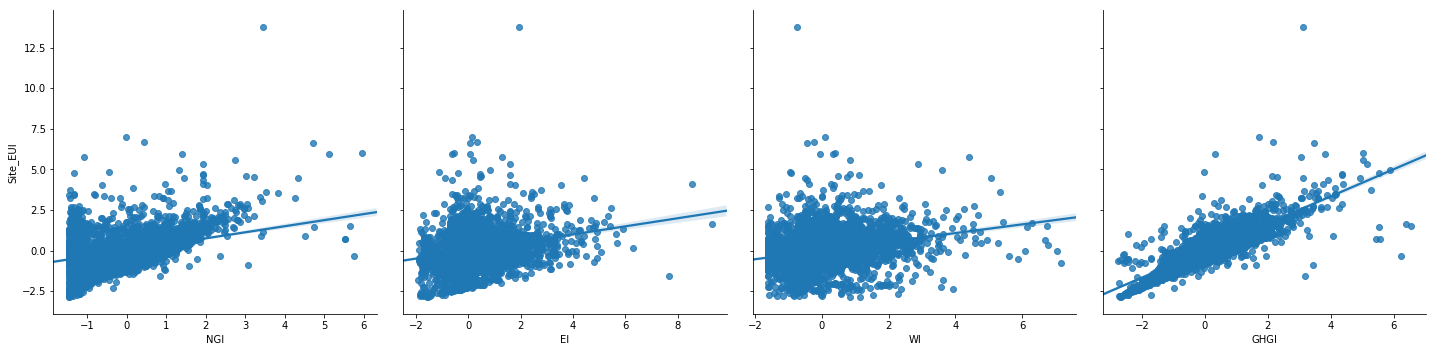

In [62]:
sns.pairplot(df2, 
             x_vars=['NGI','EI','WI','GHGI'], 
             y_vars='Site_EUI', 
             kind = 'reg',
             height=5)

In [74]:
X = df2[['NGI','EI','WI','Site_EUI']].values

Y = df2[["GHGI"]].values[:,0]

In [72]:
X

array([[-0.72056462,  0.70447493, -1.25966638, -1.16089847],
       [-0.96461614,  0.99649016,  0.30076739, -1.38540551],
       [ 0.05868243,  2.32258774,  0.12328165,  0.24227052],
       ...,
       [ 1.28083592,  0.22820441, -0.11567044,  0.92280748],
       [-1.38679849,  0.30475211,  0.40909525, -1.99578402],
       [ 0.46878794, -0.52480151, -0.65464565,  0.37907949]])

In [75]:
Y

array([-1.07930093, -1.17494   ,  0.28029977, ...,  0.49724518,
       -1.83552684, -0.53402082])

### LU FACTORIZATION

In [101]:
from scipy.linalg import lu_factor, lu_solve

# Build the covariance matrix
X_t = X.transpose()
S = X_t.dot(X)

lu, piv = lu_factor(S)

# "project the Y values on to the features and solve for coeffs"
theta = lu_solve((lu, piv), X_t.dot(Y))

In [118]:
# Get the in sample predicted values
y_hat = X.dot(theta)

df2["y_lu"] = y_hat

 Plot the predicted vs actual!

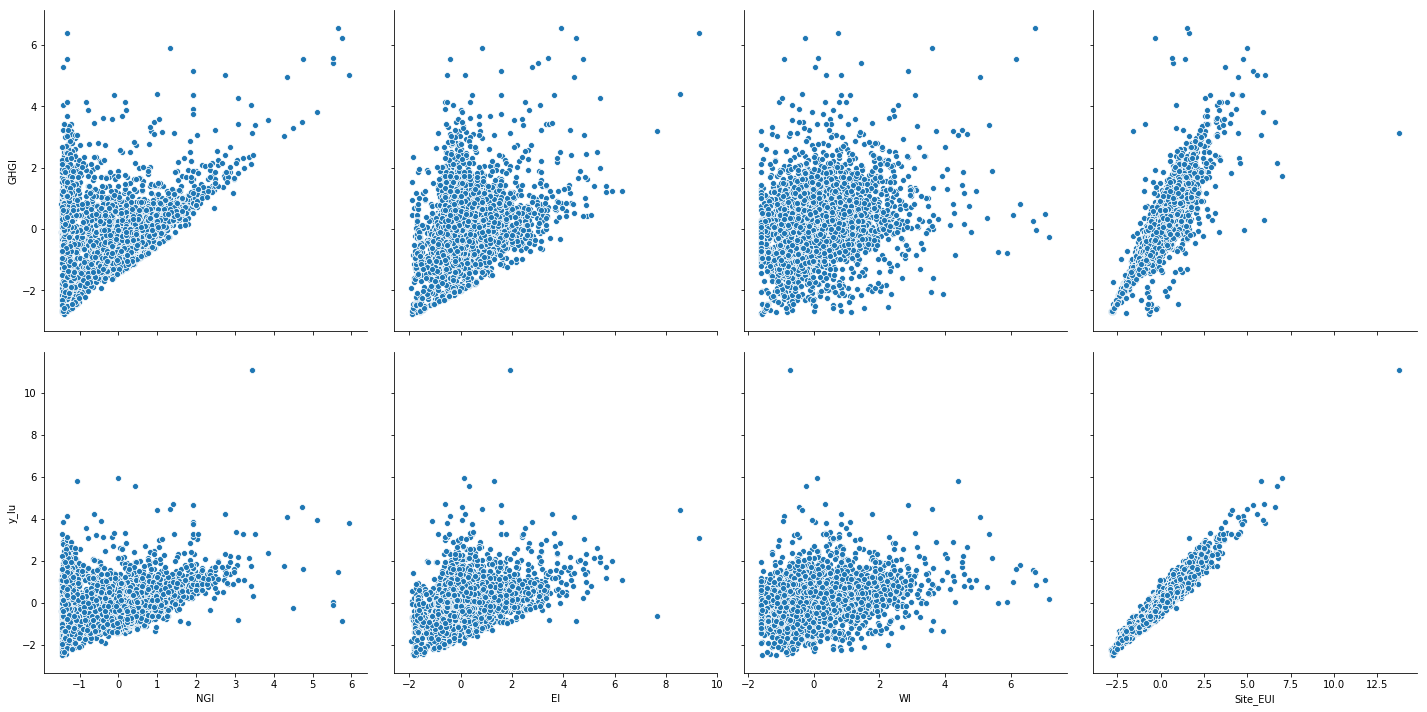

In [119]:
sns.pairplot(df2,
             x_vars=['NGI','EI','WI','Site_EUI'], 
             y_vars=['GHGI', 'y_lu'],
             kind = 'scatter',
             height=5)

Covariance matrix is symmetric!

### Cholesky Solver

If $A$ is symmetrix positive definite we can use the Cholesky decomposition

$S = L L^{T}$

to solve the system of linear equations


In [105]:
S

array([[4936.        ,  110.0869409 , 1001.57620475, 1844.63708971],
       [ 110.0869409 , 4936.        ,  -54.8774907 , 1225.78658308],
       [1001.57620475,  -54.8774907 , 4936.        , 1324.19803183],
       [1844.63708971, 1225.78658308, 1324.19803183, 4936.        ]])

In [109]:
from numpy.linalg import eigvals

eigvals(S)

array([7974.20871245, 2681.36081084, 3938.84394017, 5149.58653655])

Eigen values are all positive!

In [115]:
from scipy.linalg import cho_factor, cho_solve

L = cho_factor(S, lower=True)

theta = cho_solve(L, X_t.dot(Y))

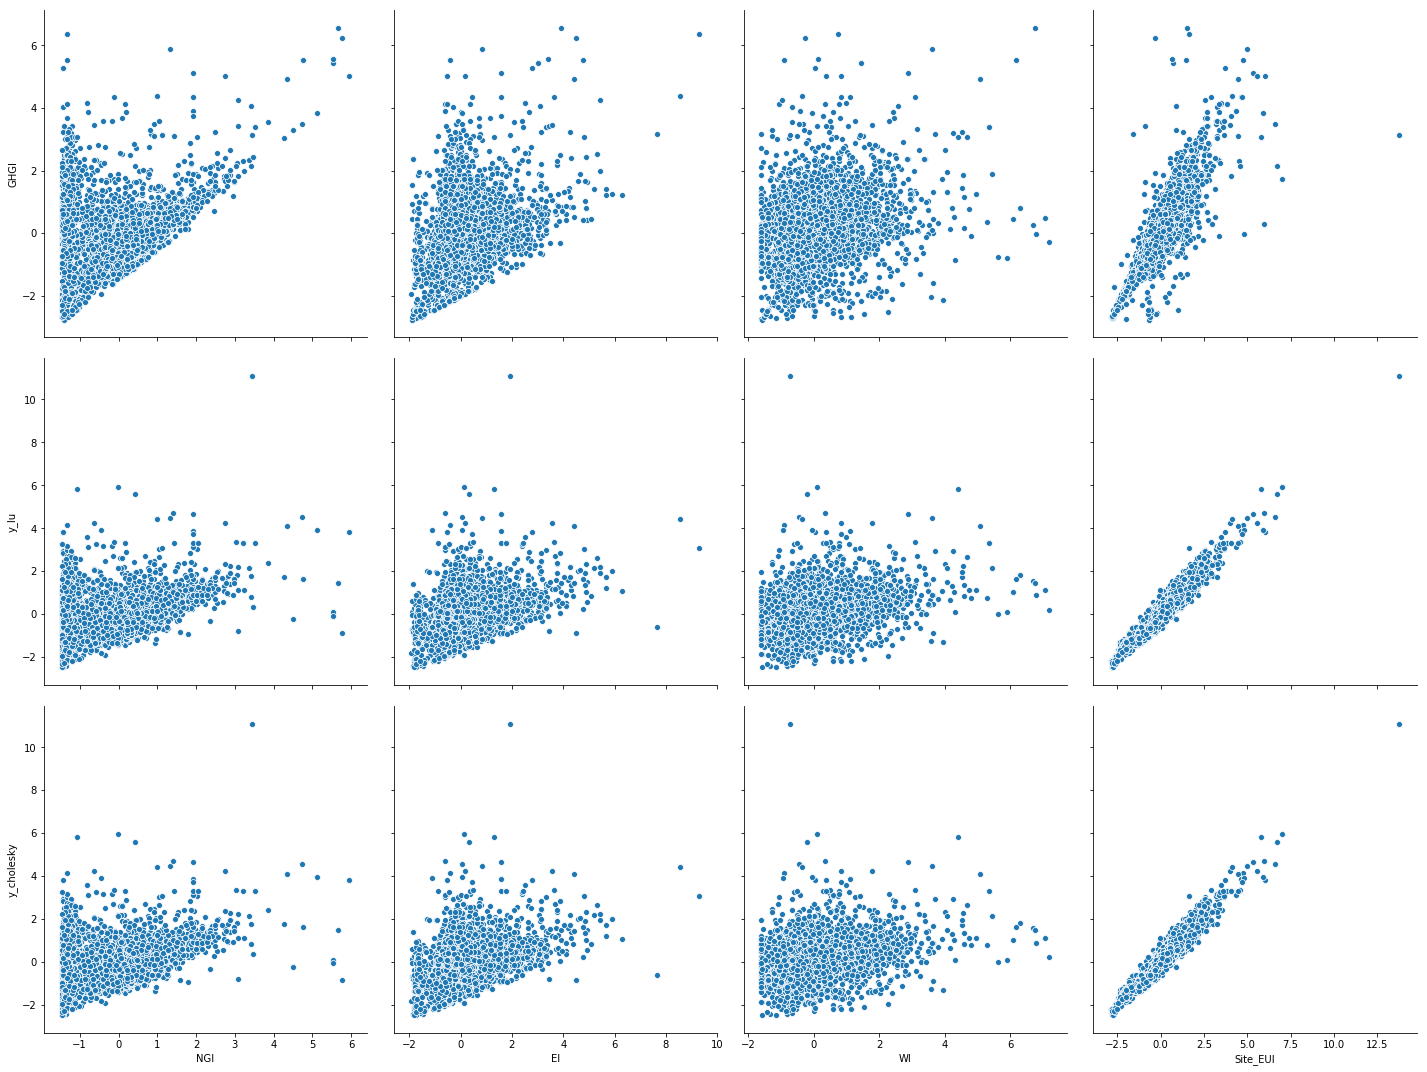

In [120]:
# Get the in sample predicted values
df2["y_cholesky"] = X.dot(theta)

sns.pairplot(df2,
             x_vars=['NGI','EI','WI','Site_EUI'], 
             y_vars=['GHGI','y_lu','y_cholesky'],
             kind = 'scatter',
             height=5)

The [Scikit-Learn](https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/linear_model/base.py#L367) implementation utilizes Scipy's [least square solver](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) if the matrix is dense calls [BLAS/LAPACK](https://github.com/numpy/numpy/blob/master/numpy/linalg/umath_linalg.c.src#L3167).  If the matrix $X$ is sparse then it calls SciPy's [sparse least squares solver](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) which uses least squres with QR factorization [LSQR](https://github.com/scipy/scipy/blob/v1.3.2/scipy/sparse/linalg/isolve/lsqr.py#L98-L570)

## Ridge Regression
----------------------------

https://en.wikipedia.org/wiki/Tikhonov_regularization

## Recommendation Systems: Alternating Least Squares
------------------------------------

http://www.mattmoocar.me/recsys/

https://medium.com/radon-dev/als-implicit-collaborative-filtering-5ed653ba39fe

## Regression With Principle Component Analysis
-------------------------------